# Script XA DSA
This notebook imports necessary libraries and data from Excel files to work with ...

In [1]:
import dt_ids7_export_module as bh_utils
import mapping_module as bh_map
import plot_module as bh_plot

# Get the name of the computer:
import socket
hostname = socket.gethostname()
if hostname == 'BHs-Desktop':
    path = 'C:\\' # 'E:\\'
elif hostname == 'BH-XPS':
    path = 'G:\\'
else:
    path = 'D:\\'


# Import the IDS7 data:
root_folder = path + "Users\\bjorn\\Downloads\\repdoser\\IDS7\\"
df_ids7 = bh_utils.import_excel_files_to_dataframe(root_folder)

# Import the IDS7 data:
root_folder = path + "Users\\bjorn\\Downloads\\repdoser\\DoseTrack - Serienivå\\"
df_dt = bh_utils.import_excel_files_to_dataframe(root_folder)

Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-01 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-02 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-03 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-04 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-05 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-06 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-07 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-08 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-09 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-10 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-11 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-12 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-01 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdo

In [2]:
# Run all cleanups, filters and checks:
df_ids7 = bh_utils.run_all_cleanup_filters_and_checks(df_ids7, df_dt, True)
# Merge the dataframes:
data = bh_utils.merge_ids7_dt(df_ids7, df_dt, True)

Dropping unnecessary column: Prioritet- og lesemerkeikon
Dropping unnecessary column: Lagt til i demonstrasjon-ikon
Dropping unnecessary column: Status
Number of rows with NaT in the column "Bestilt dato og tidspunkt": 1955
Number of cancelled procedures: 2420
Number of non-human subjects: 121
Number of rows with invalid accession number: 17
676      NBOU000007962455
677      NBOU000007962455
2919     NORRAD0004436111
2920     NORRAD0004436111
2922     NORRAD0004443460
19989    NNRA000008253963
22565    NORRAD0004440016
35763    NNRA000008470721
35764    NNRA000008470721
38959    NNUL000009420412
42560    NNRA000009433721
52155    NNRA000009532398
52156    NNRA000009578608
58414    NNUL000009507772
58415    NNUL000009507772
58416    NNUL000009612281
68343    NBOU000012935221
Name: Henvisnings-ID, dtype: object
1277 entries was found matching the old siemens PACS format (7 characters long with only numbers.)
These will be converted to the new Sectra PACS format by adding "MUAH_" in fron

In [ ]:
# Print all unique elements in Modality Room, sorted alphabetically:
print("Unique elements in Modality Room:")
print(sorted(data['Modality Room'].unique()))

In [3]:
import mapping_dict_PCI as pci_dict
# Representative doser for radiologisk Rikshospital
data = data[data['Modality Room'].isin(['IRH_XA6', 'IRH_XA7', 'KRH_XA3', 'KRH_XA6', 'KRH_XA7', 'KRH_XA8','KUL_XA1', 'KUL_XA2', 'KUL_XA4'])]
import importlib
importlib.reload(pci_dict)


# Get the mapping dictionary:
mapping_dict = pci_dict.get_PCI_mapping_dict()
data = bh_map.map_procedures(data, mapping_dict, True)


Mapping procedures...

RGV Cor Mitraclip (int.) -> Mitraclip
RGA Cor TAVI (int.) -> TAVI
RGA Cor Koronarangiografi (int.) & ~RGA Cor PCI & ~RGA Cor PTSMA & ~RGA Cor ECMO & ~RGV Cor PFO & ~RGA Cor TAVI -> Koronarangiografi
RGA Cor PCI & ~RGA Cor ECMO & ~RGA Cor TAVI -> PCI
RGA Cor PTSMA (int.) & ~RGA Cor PCI -> PTSMA
RGV Cor PFO (int.) -> PFO


In [4]:
# Filter all examinations before June 1st 2023:
data_2023_fra_jun = data[(data['Study Date'] >= '2023-06-01') & (data['Study Date'] < '2024-01-01')]
data_2024 = data[(data['Study Date'] >= '2024-01-01') & (data['Study Date'] < '2025-01-01')]
# January 2024:
data_Jan_2024 = data[(data['Study Date'] >= '2024-01-01') & (data['Study Date'] < '2024-02-01')]
data_Feb_2024 = data[(data['Study Date'] >= '2024-02-01') & (data['Study Date'] < '2024-03-01')]
data_Mar_2024 = data[(data['Study Date'] >= '2024-03-01') & (data['Study Date'] < '2024-04-01')]
data_Apr_2024 = data[(data['Study Date'] >= '2024-04-01') & (data['Study Date'] < '2024-05-01')]
data_May_2024 = data[(data['Study Date'] >= '2024-05-01') & (data['Study Date'] < '2024-06-01')]




In [4]:
# Filter all examinations before June 1st 2023:
data_2023 = data[data['Study Date'] >= '2023-06-01']
# January 2024:
data_Jan_2024 = data[(data['Study Date'] >= '2024-01-01') & (data['Study Date'] < '2024-02-01')]

Reporting doses for Koronarangiografi:


Alle: n = 2903, DAP: Median - 10.3, 95% CI: [9.91 - 10.67] IQR [6.1 - 17.9], Range (0.0 - 235.7).


KRH_XA3: n =  384, DAP: Median - 13.13 (Gy*cm2), 95% CI: [11.77 - 14.55] IQR [7.33 - 23.37], Range (1.21 - 142.96).
KRH_XA6: n =  275, DAP: Median - 11.44 (Gy*cm2), 95% CI: [10.42 - 12.7] IQR [6.82 - 18.96], Range (0.27 - 193.89).
KRH_XA7: n =  745, DAP: Median - 13.0 (Gy*cm2), 95% CI: [12.18 - 13.82] IQR [7.27 - 23.12], Range (1.77 - 168.5).
KRH_XA8: n =  351, DAP: Median - 10.01 (Gy*cm2), 95% CI: [9.09 - 11.4] IQR [6.39 - 19.4], Range (0.01 - 235.73).
KUL_XA1: n =  412, DAP: Median - 7.56 (Gy*cm2), 95% CI: [7.02 - 8.26] IQR [5.06 - 11.64], Range (0.44 - 47.89).
KUL_XA2: n =  455, DAP: Median - 8.43 (Gy*cm2), 95% CI: [7.68 - 8.93] IQR [5.5 - 13.49], Range (1.07 - 94.2).
KUL_XA4: n =  281, DAP: Median - 9.51 (Gy*cm2), 95% CI: [8.52 - 10.61] IQR [5.16 - 14.59], Range (0.37 - 94.69).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


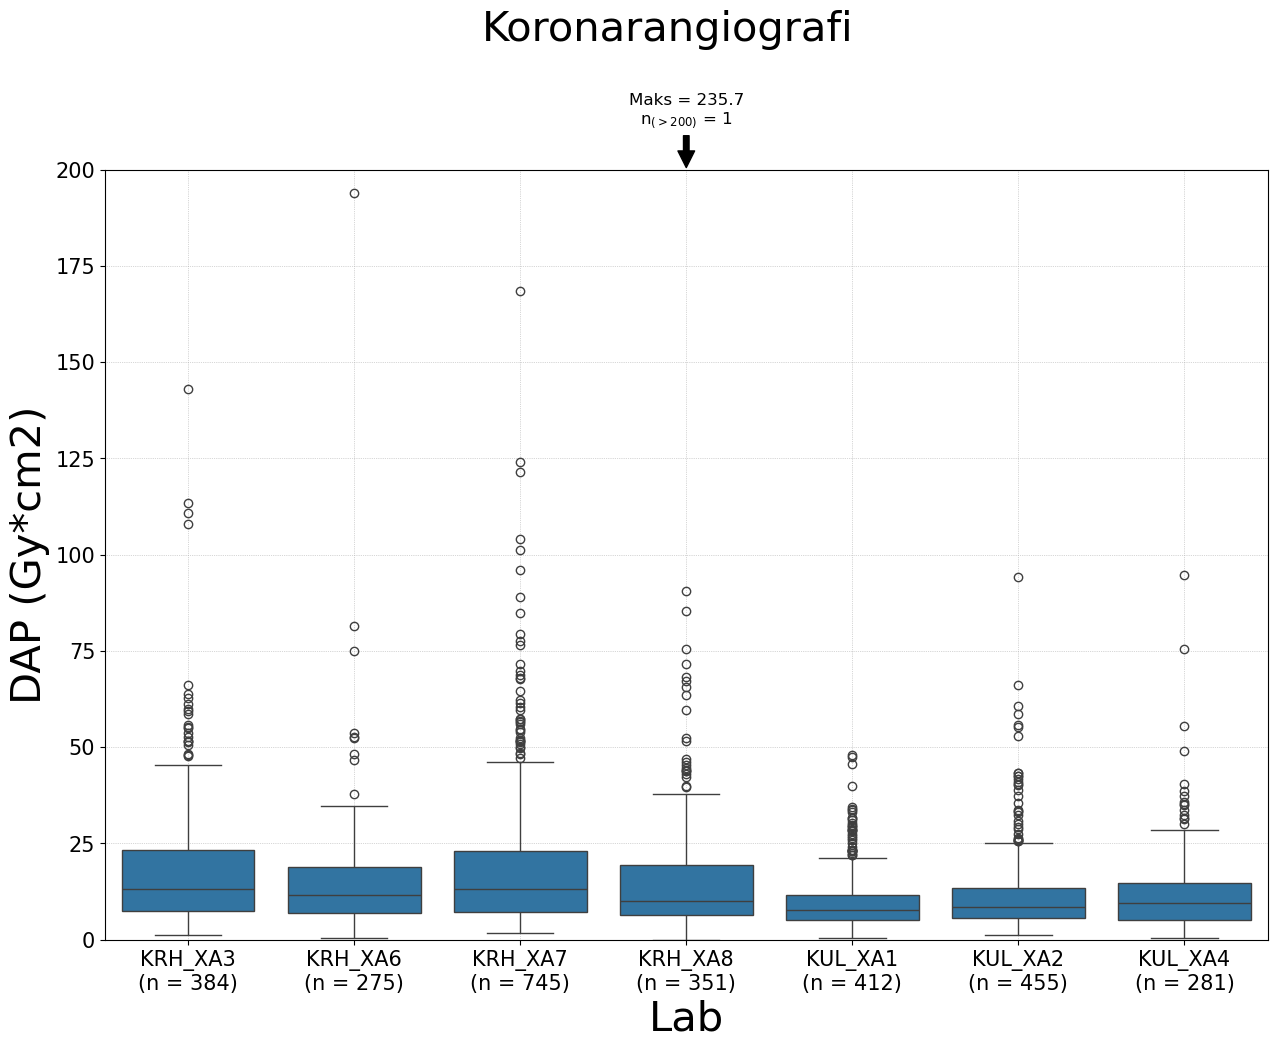

In [6]:
procedure = 'Koronarangiografi'
export = False
bh_plot.plot_representative_dose(data_2023_fra_jun, procedure, 200, export)

Reporting doses for Koronarangiografi:


Alle: n = 4903, DAP: Median - 11.1, 95% CI: [10.81 - 11.38] IQR [6.4 - 19.4], Range (0.2 - 274.7).


KRH_XA3: n =  871, DAP: Median - 12.58 (Gy*cm2), 95% CI: [11.62 - 13.51] IQR [7.2 - 21.14], Range (1.22 - 175.9).
KRH_XA6: n =  308, DAP: Median - 12.48 (Gy*cm2), 95% CI: [11.39 - 13.74] IQR [6.98 - 19.93], Range (0.98 - 106.1).
KRH_XA7: n = 1125, DAP: Median - 13.22 (Gy*cm2), 95% CI: [12.28 - 13.99] IQR [7.52 - 23.41], Range (0.25 - 274.74).
KRH_XA8: n =  750, DAP: Median - 16.0 (Gy*cm2), 95% CI: [14.84 - 17.04] IQR [9.33 - 28.18], Range (1.66 - 225.52).
KUL_XA1: n =  624, DAP: Median - 6.97 (Gy*cm2), 95% CI: [6.43 - 7.54] IQR [4.44 - 11.15], Range (0.6 - 70.38).
KUL_XA2: n =  772, DAP: Median - 8.53 (Gy*cm2), 95% CI: [8.19 - 9.01] IQR [5.44 - 13.91], Range (1.17 - 104.93).
KUL_XA4: n =  453, DAP: Median - 10.1 (Gy*cm2), 95% CI: [9.2 - 10.81] IQR [6.09 - 15.39], Range (1.11 - 125.73).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


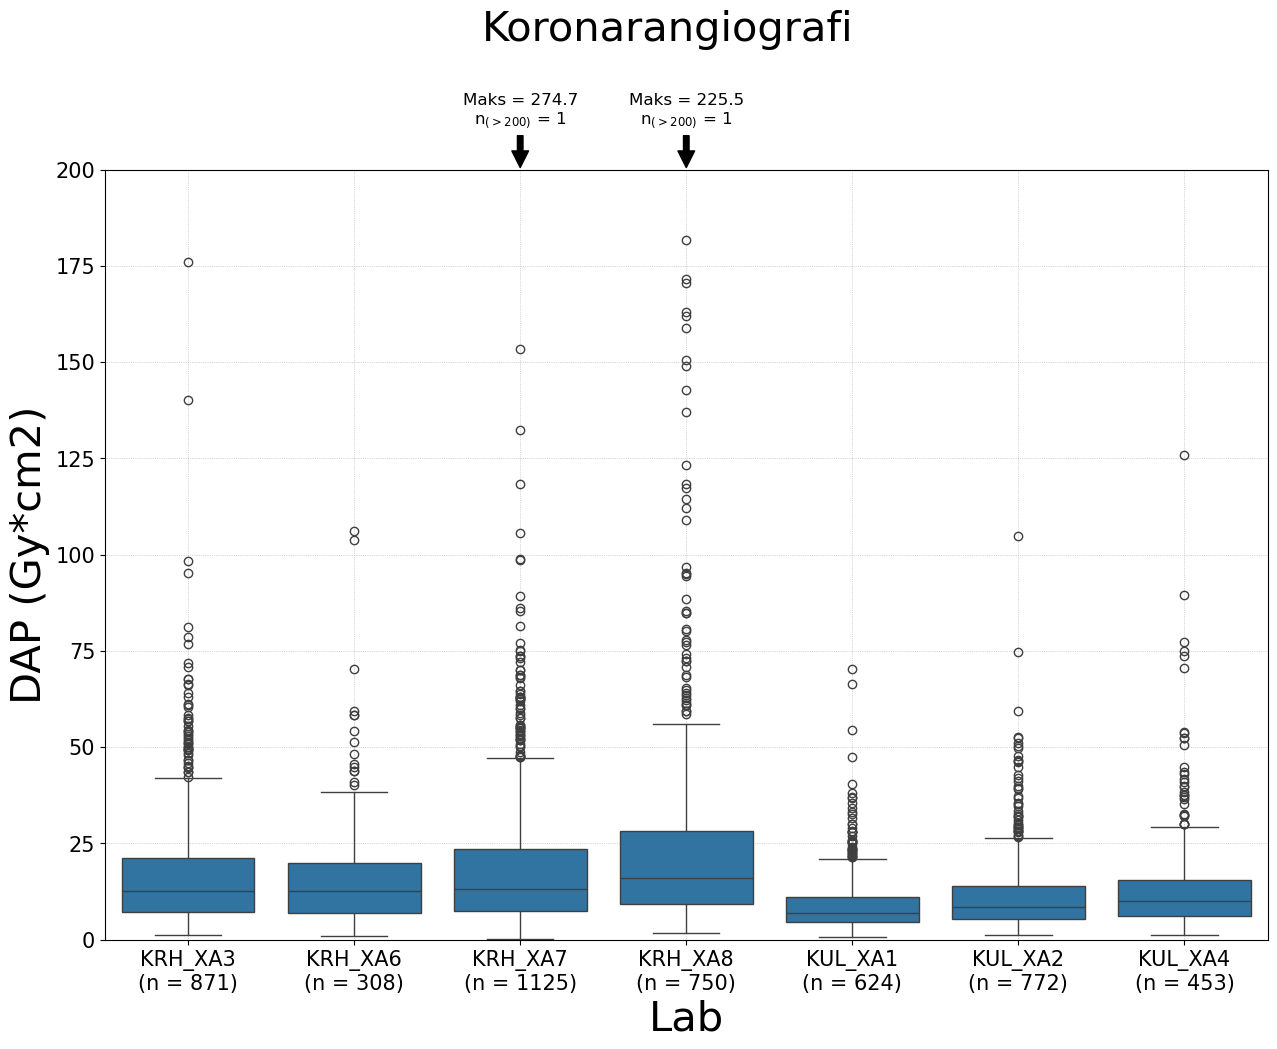

In [7]:
procedure = 'Koronarangiografi'
export = False
bh_plot.plot_representative_dose(data_2024, procedure, 200, export)

Reporting doses for Koronarangiografi:


Alle: n =  466, DAP: Median - 10.8, 95% CI: [9.94 - 11.94] IQR [6.3 - 18.9], Range (1.0 - 137.1).


KRH_XA3: n =   76, DAP: Median - 13.65 (Gy*cm2), 95% CI: [10.99 - 15.88] IQR [9.3 - 20.26], Range (3.9 - 71.72).
KRH_XA6: n =   34, DAP: Median - 12.45 (Gy*cm2), 95% CI: [10.81 - 14.11] IQR [8.5 - 18.43], Range (0.98 - 51.37).
KRH_XA7: n =  113, DAP: Median - 15.15 (Gy*cm2), 95% CI: [12.65 - 17.86] IQR [7.34 - 23.34], Range (1.37 - 98.88).
KRH_XA8: n =   72, DAP: Median - 12.05 (Gy*cm2), 95% CI: [8.78 - 15.63] IQR [6.21 - 21.73], Range (1.74 - 137.09).
KUL_XA1: n =   52, DAP: Median - 6.48 (Gy*cm2), 95% CI: [5.23 - 7.78] IQR [4.62 - 8.52], Range (1.36 - 47.42).
KUL_XA2: n =   82, DAP: Median - 8.04 (Gy*cm2), 95% CI: [6.87 - 9.67] IQR [5.8 - 12.44], Range (1.32 - 46.21).
KUL_XA4: n =   37, DAP: Median - 10.04 (Gy*cm2), 95% CI: [7.92 - 11.58] IQR [7.3 - 14.52], Range (1.8 - 73.71).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


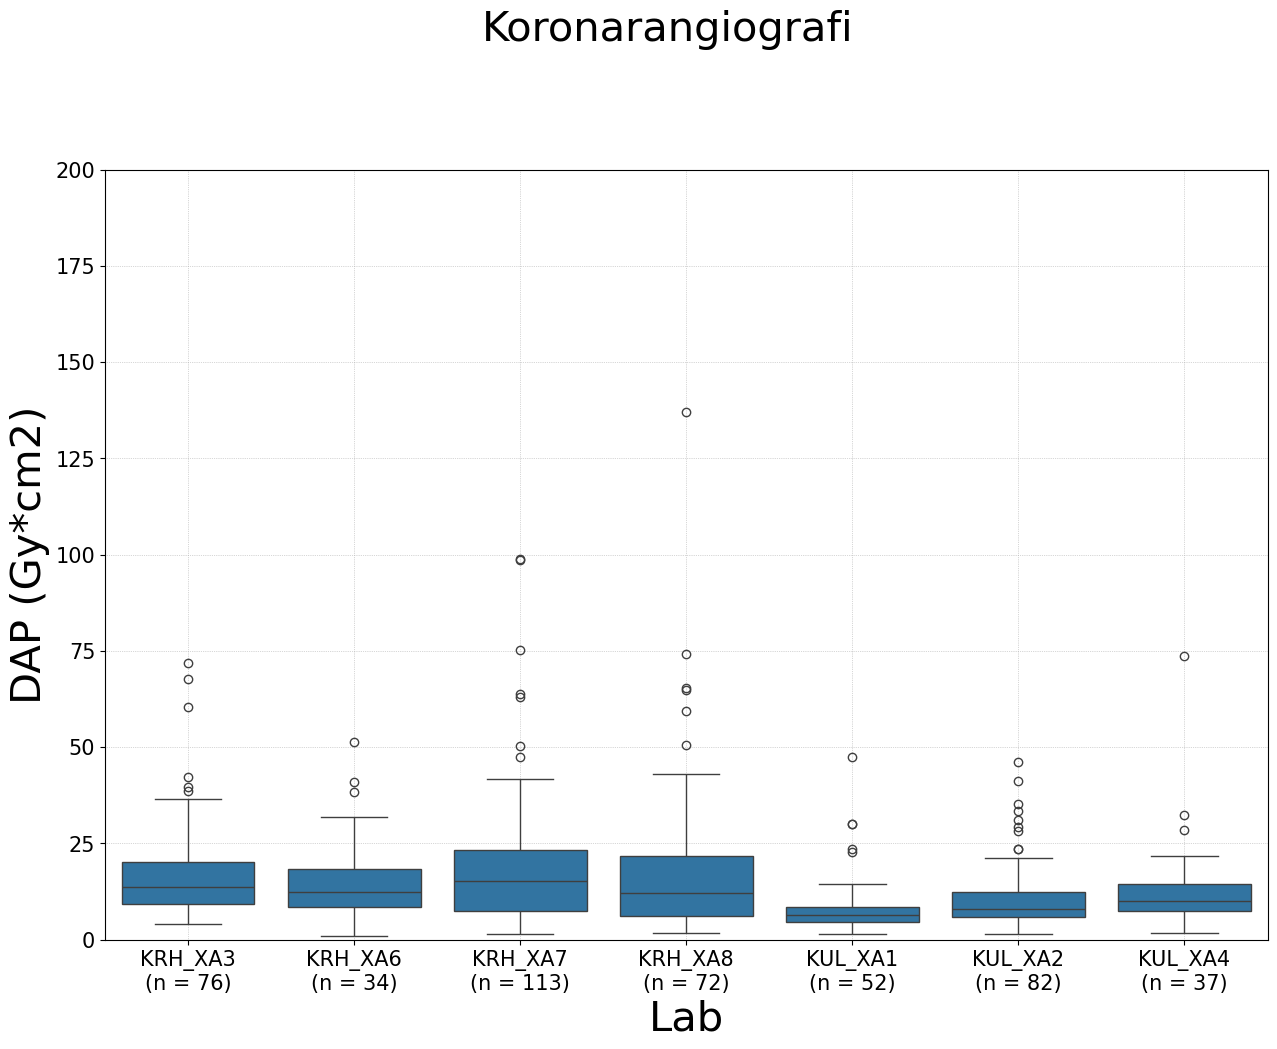

In [8]:
procedure = 'Koronarangiografi'
export = False
bh_plot.plot_representative_dose(data_Jan_2024, procedure, 200, export)

Reporting doses for Koronarangiografi:


Alle: n =  419, DAP: Median - 10.6, 95% CI: [9.69 - 11.39] IQR [6.1 - 18.0], Range (0.2 - 158.9).


KRH_XA3: n =   67, DAP: Median - 12.16 (Gy*cm2), 95% CI: [9.16 - 16.83] IQR [6.6 - 21.23], Range (2.22 - 140.08).
KRH_XA6: n =   35, DAP: Median - 16.61 (Gy*cm2), 95% CI: [10.71 - 19.93] IQR [8.16 - 24.81], Range (2.02 - 58.33).
KRH_XA7: n =   99, DAP: Median - 10.94 (Gy*cm2), 95% CI: [9.38 - 13.75] IQR [7.03 - 19.44], Range (0.25 - 118.27).
KRH_XA8: n =   57, DAP: Median - 16.0 (Gy*cm2), 95% CI: [13.15 - 20.51] IQR [7.77 - 28.18], Range (2.17 - 158.91).
KUL_XA1: n =   45, DAP: Median - 8.15 (Gy*cm2), 95% CI: [6.04 - 10.07] IQR [5.39 - 11.05], Range (3.1 - 66.44).
KUL_XA2: n =   73, DAP: Median - 7.42 (Gy*cm2), 95% CI: [6.06 - 8.76] IQR [4.51 - 12.1], Range (1.33 - 74.65).
KUL_XA4: n =   43, DAP: Median - 10.28 (Gy*cm2), 95% CI: [8.51 - 11.47] IQR [7.23 - 12.99], Range (2.56 - 39.56).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


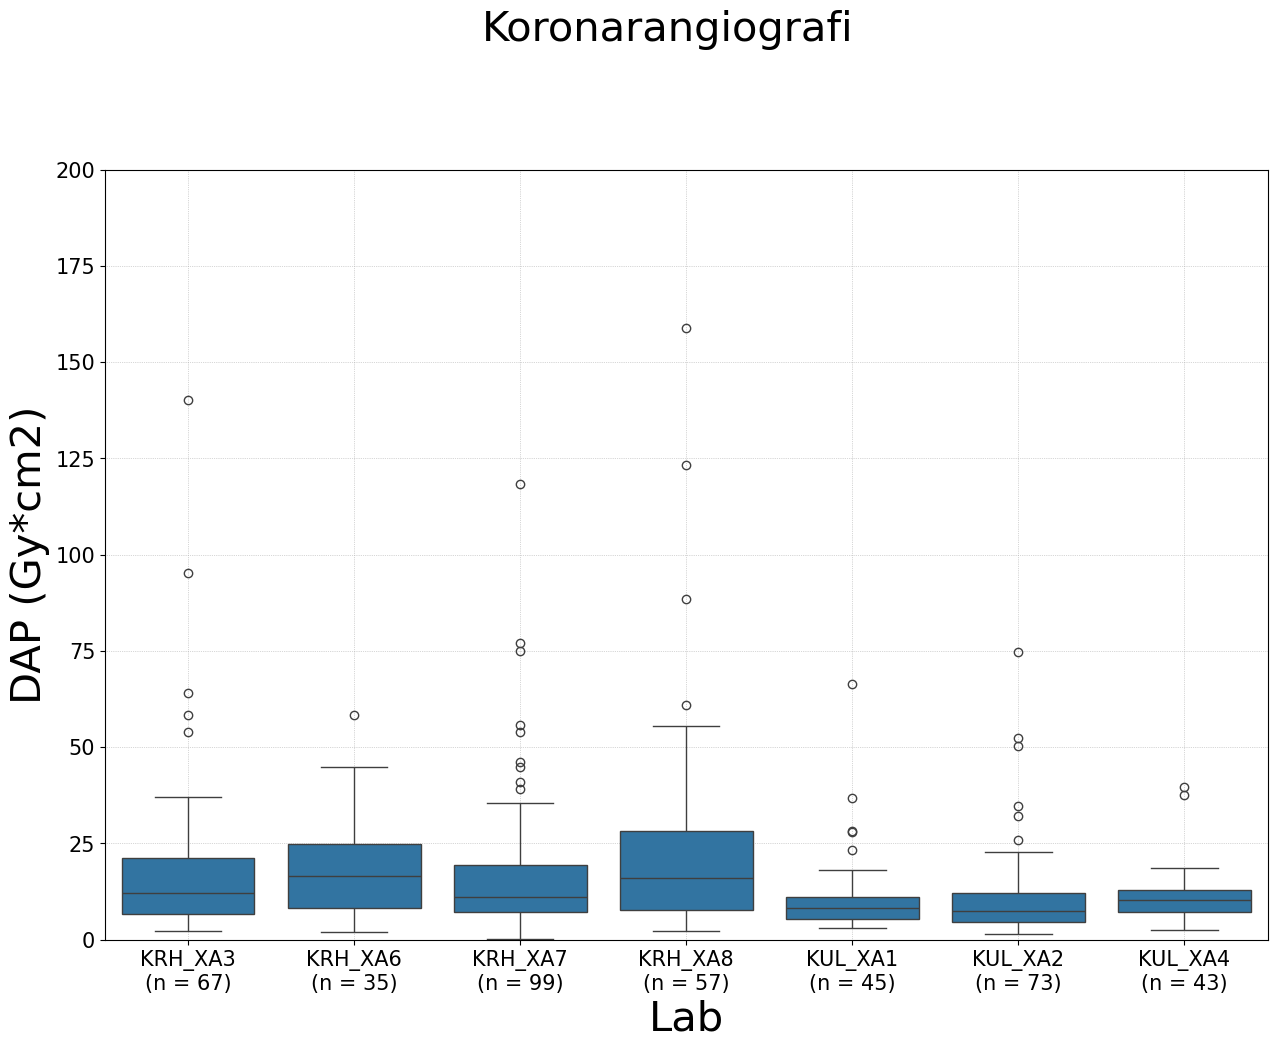

In [9]:
procedure = 'Koronarangiografi'
export = False
bh_plot.plot_representative_dose(data_Feb_2024, procedure, 200, export)

Reporting doses for Koronarangiografi:


Alle: n =  371, DAP: Median - 10.9, 95% CI: [10.0 - 12.16] IQR [6.0 - 18.9], Range (1.4 - 98.3).


KRH_XA3: n =   61, DAP: Median - 12.92 (Gy*cm2), 95% CI: [8.85 - 17.36] IQR [7.1 - 22.2], Range (1.66 - 98.29).
KRH_XA6: n =   24, DAP: Median - 14.07 (Gy*cm2), 95% CI: [7.44 - 17.02] IQR [6.11 - 17.2], Range (2.91 - 59.44).
KRH_XA7: n =   91, DAP: Median - 12.53 (Gy*cm2), 95% CI: [11.42 - 16.43] IQR [8.85 - 22.86], Range (2.23 - 68.82).
KRH_XA8: n =   57, DAP: Median - 14.36 (Gy*cm2), 95% CI: [10.8 - 18.89] IQR [6.58 - 26.86], Range (2.55 - 72.28).
KUL_XA1: n =   55, DAP: Median - 5.43 (Gy*cm2), 95% CI: [4.44 - 7.73] IQR [3.72 - 9.15], Range (1.35 - 28.05).
KUL_XA2: n =   45, DAP: Median - 9.0 (Gy*cm2), 95% CI: [7.4 - 13.41] IQR [4.88 - 15.48], Range (2.08 - 52.48).
KUL_XA4: n =   38, DAP: Median - 9.2 (Gy*cm2), 95% CI: [5.96 - 13.41] IQR [5.39 - 16.8], Range (2.81 - 53.85).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


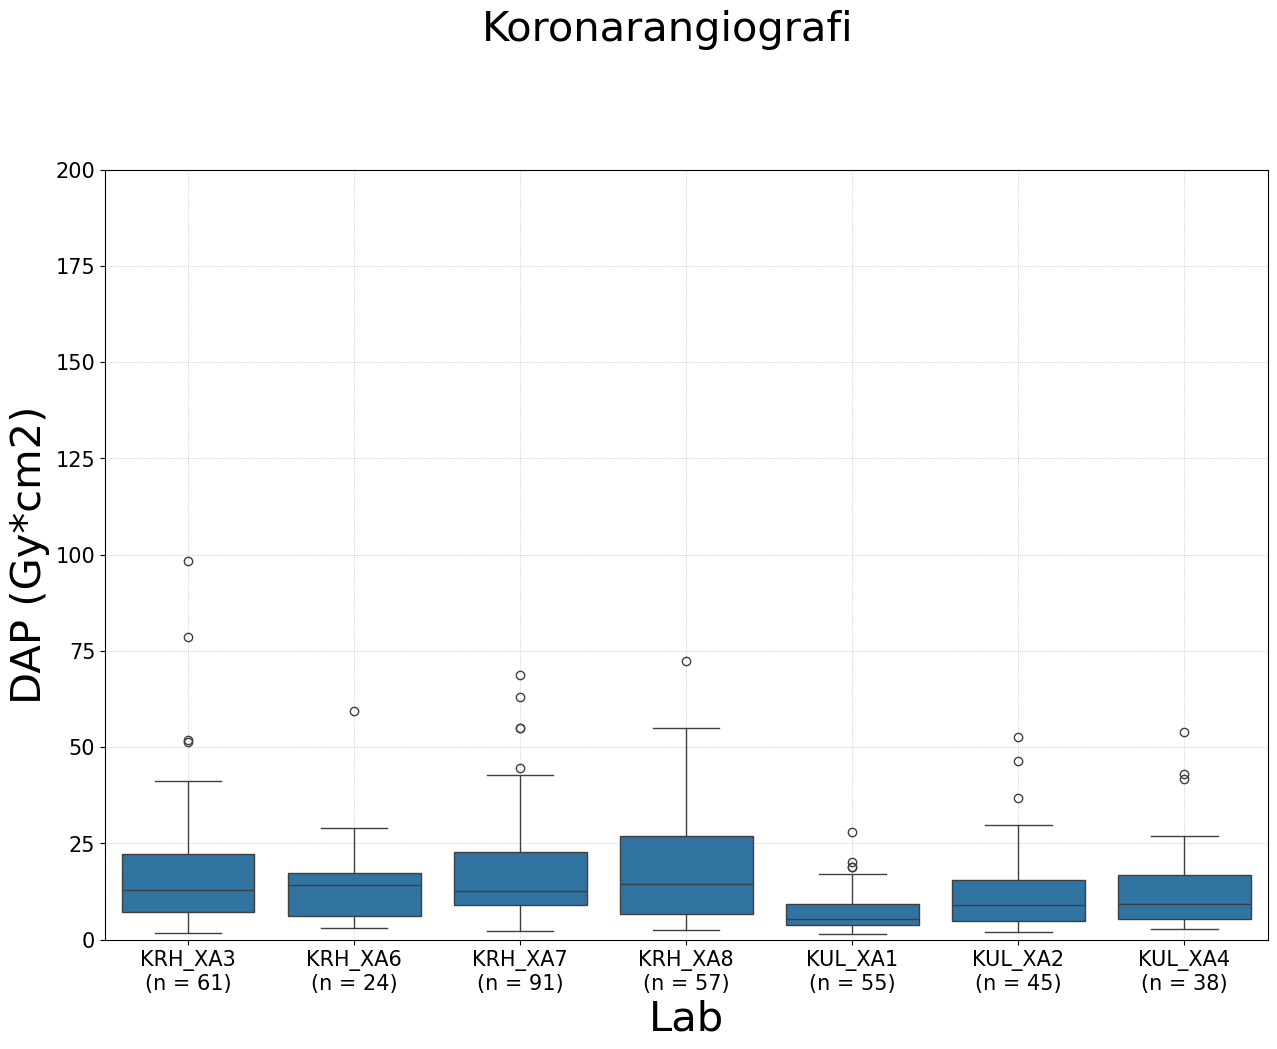

In [10]:
procedure = 'Koronarangiografi'
export = False
bh_plot.plot_representative_dose(data_Mar_2024, procedure, 200, export)

Reporting doses for Koronarangiografi:


Alle: n =  448, DAP: Median - 11.8, 95% CI: [10.63 - 13.0] IQR [6.7 - 19.6], Range (1.1 - 170.4).


KRH_XA3: n =   77, DAP: Median - 11.27 (Gy*cm2), 95% CI: [9.86 - 14.78] IQR [6.9 - 18.8], Range (1.49 - 57.49).
KRH_XA6: n =   38, DAP: Median - 14.96 (Gy*cm2), 95% CI: [9.35 - 18.27] IQR [7.64 - 20.79], Range (2.21 - 45.57).
KRH_XA7: n =   93, DAP: Median - 13.12 (Gy*cm2), 95% CI: [11.33 - 16.72] IQR [7.61 - 22.63], Range (2.4 - 105.53).
KRH_XA8: n =   67, DAP: Median - 18.64 (Gy*cm2), 95% CI: [15.85 - 22.76] IQR [10.51 - 34.91], Range (3.26 - 170.41).
KUL_XA1: n =   58, DAP: Median - 6.79 (Gy*cm2), 95% CI: [5.05 - 8.82] IQR [4.53 - 10.7], Range (1.55 - 31.52).
KUL_XA2: n =   65, DAP: Median - 8.51 (Gy*cm2), 95% CI: [7.1 - 12.48] IQR [5.58 - 14.88], Range (2.04 - 39.88).
KUL_XA4: n =   50, DAP: Median - 13.08 (Gy*cm2), 95% CI: [10.2 - 15.83] IQR [7.55 - 21.65], Range (1.11 - 125.73).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


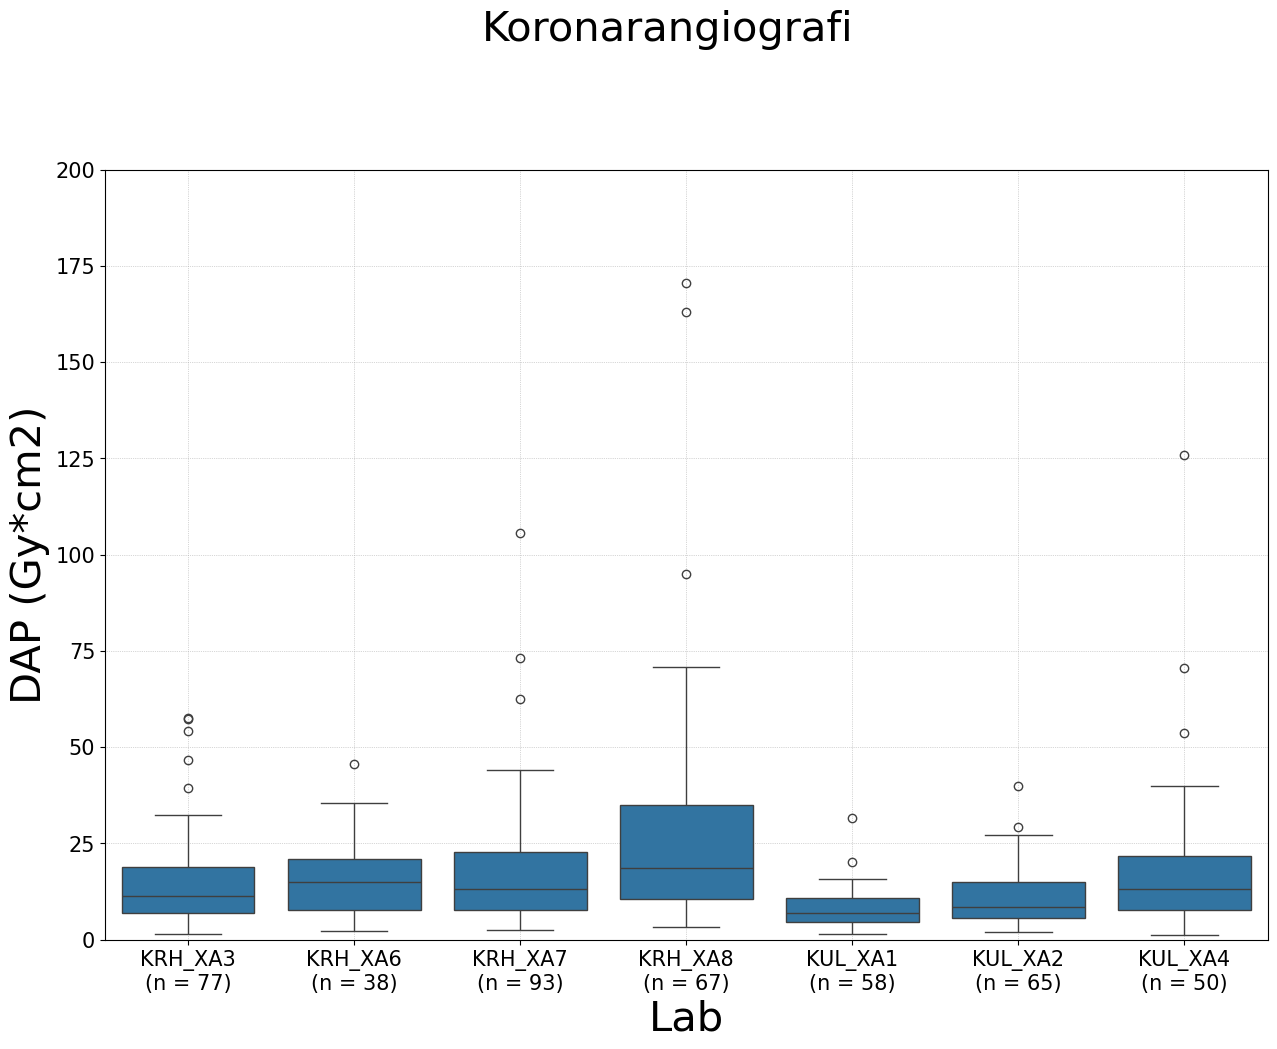

In [11]:
procedure = 'Koronarangiografi'
export = False
bh_plot.plot_representative_dose(data_Apr_2024, procedure, 200, export)

In [ ]:
procedure = 'Koronarangiografi'
export = False
bh_plot.plot_representative_dose(data, procedure, 200, export)

In [ ]:
procedure = 'PCI'
export = False
bh_plot.plot_representative_dose(data, procedure, 200, export)

In [ ]:
procedure = 'TAVI'
export = False
bh_plot.plot_representative_dose(data, procedure, 200, export)

In [ ]:
procedure = 'Mitraclip'
export = False
bh_plot.plot_representative_dose(data, procedure, 200, export)

In [ ]:
procedure = 'PTSMA'
export = False
bh_plot.plot_representative_dose(data, procedure, 200, export)

In [ ]:
procedure = 'PFO'
export = False
bh_plot.plot_representative_dose(data, procedure, 200, export)